In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error, r2_score
from collections import Counter

import statsmodels.api as sm

In [31]:
# cal = pd.read_csv('calendar.csv.gz')
# listd = pd.read_csv('listings.csv.gz')
# lists = pd.read_csv('listings.csv')
# revs = pd.read_csv('reviews.csv.gz')
# nhood = pd.read_csv('neighbourhoods.csv')
purelst = pd.read_csv('listings.csv.gz')

In [32]:
# pd.set_option('display.max_colu?mns', 96)
pd.set_option('display.max_rows', 96)

In [33]:
import pickle
X_train= pd.read_pickle('pkls/price_split/X_lt_train.pkl')
y_train= pd.read_pickle('pkls/price_split/y_lt_train.pkl')
X_test= pd.read_pickle('pkls/price_split/X_lt_test.pkl')
y_test= pd.read_pickle('pkls/price_split/y_lt_test.pkl')

In [34]:
def my_metric(y_act,y_pred):
    r2_score= (1 - ((y_act-y_pred) ** 2).sum() / ((y_act-y_act.mean())**2).sum() )
#     print("My R2Score = ",r2_score)
    return(r2_score)

In [35]:
#### Prepare specific data for this notebook

In [36]:
# linreg_cols=['bedrooms','bathrooms','accommodates','cleaning_fee','beds']
# X_train.drop(linreg_cols,axis=1,inplace=True)
# X_test.drop(linreg_cols,axis=1,inplace=True)
# X_train.head().T

# Gradient Boost Regressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.datasets import make_regression
# # X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state':0}

gbr = GradientBoostingRegressor(**params)
# gbr = GradientBoostingRegressor(max_depth=2, random_state=0)

gbr.fit(X_train, y_train)
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
y_predGBR = gbr.predict(X_test)
mse= mean_squared_error(y_test,y_predGBR)
print("MSE: %.4f" %mse)
print("My GBR Score : %.4f",my_metric(y_test,y_predGBR))

MSE: 3240.2734
My GBR Score : %.4f 0.6592742386263497


<BarContainer object of 49 artists>

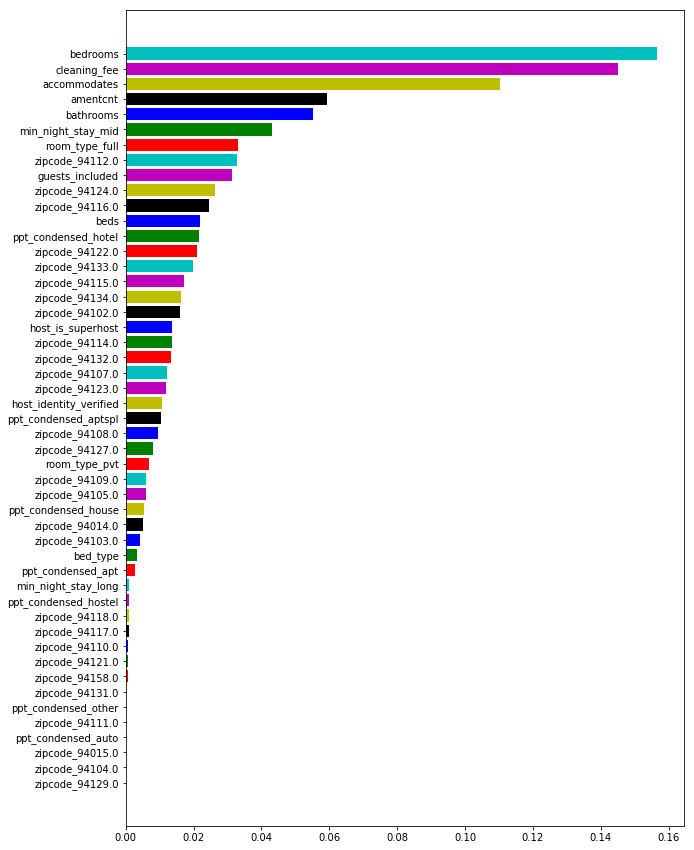

In [39]:
featurelist=X_train.columns
featureimp= gbr.feature_importances_

tmp_df=featurelist.to_frame(index=False)
tmp_df=tmp_df.rename(columns={0:'feature'})
tmp_df['prime']=featureimp
feature_df=tmp_df.sort_values(by=['prime'], ascending=True)

fig=plt.figure(figsize=(10,15))
ax1=fig.add_subplot(111)
ax1.barh(feature_df['feature'],feature_df['prime'],color='rgbkymc')

In [41]:
print(gbr.predict([[0,0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[70.66898422]


In [42]:
y_pred=gbr.predict(X_test)

gbr_score=gbr.score(X_test,y_test)
print("GBR Forest Score",gbr_score)

#Calculate the baseline errors
baseline = abs(y_test.mean()-y_test)
print("Baseline Absolute Error",np.mean(baseline))

#Calculate the absolute errors
residuals = abs(y_pred-y_test)
print("Mean Absolute Error",np.mean(residuals))

#Calculate Mean Absolute pct error
mape = (residuals/y_test)*100

#Accuracy 
accy=100-np.mean(mape)

#Mean Absolute Error 

print("Accuracy",round(accy,2), '%')

print("My R2 Score is : ",my_metric(y_test,y_pred))

GBR Forest Score 0.6592742386263497
Baseline Absolute Error 77.42548779203487
Mean Absolute Error 42.68215613682894
Accuracy 69.57 %
My R2 Score is :  0.6592742386263497


In [43]:
y_pred

array([215.23987142,  90.53835479, 243.25498039,  80.10412476,
        92.74595863, 230.1729503 , 112.18876936, 247.06487744,
       160.38246519, 190.31553279, 127.54638858, 103.59757644,
        94.57359785, 258.94629169, 160.02990736, 107.73057696,
       113.72911115, 289.69012271, 323.64502605,  93.12763599,
       189.86438436, 118.89822912, 234.31336566, 122.41994189,
       135.82847103, 122.64647397, 190.31553279,  71.9918193 ,
       134.09778041, 120.87630494, 228.44021879, 167.34967177,
       187.08363302, 234.39037245, 244.45508994, 205.81365405,
       252.0746676 , 108.16715144, 265.37059944, 154.60833991,
        88.73831501, 216.03649763, 183.86869562, 117.99964343,
       104.98097934, 188.8397244 , 359.81853833, 116.06258624,
       161.46081686,  84.5728286 ,  88.80616893, 128.47681462,
       197.89163253, 278.23823802, 287.02214906, 306.80605922,
       246.8703843 , 165.89191742, 195.14069579, 129.09801259,
       198.64617734, 118.78575638, 190.06688493, 209.25

In [44]:
#Building Residual DF

# dfpred= y_test.to_frame()
dfpred = pd.DataFrame()
dfpred['price'] = y_test
dfpred['rf_preds'] = y_pred
dfpred['rf_resid'] = dfpred.rf_preds-dfpred.price
dfpred['rf_residpct'] = (dfpred.rf_preds-dfpred.price)/dfpred.price
dfpred.head()

,price,rf_preds,rf_resid,rf_residpct
3038,200.0,215.239871,15.239871,0.076199
4291,49.0,90.538355,41.538355,0.847722
1872,195.0,243.254980,48.254980,0.247461
3107,32.0,80.104125,48.104125,1.503254
2817,59.0,92.745959,33.745959,0.571965


In [45]:
dfpred[dfpred.price > 1000]

,price,rf_preds,rf_resid,rf_residpct


In [46]:
dfpred[dfpred.price < 100]

,price,rf_preds,rf_resid,rf_residpct
4291,49.0,90.538355,41.538355,0.847722
3107,32.0,80.104125,48.104125,1.503254
2817,59.0,92.745959,33.745959,0.571965
3301,85.0,127.546389,42.546389,0.500546
116,56.0,94.573598,38.573598,0.688814
2812,58.0,107.730577,49.730577,0.857424
2587,90.0,93.127636,3.127636,0.034752
2427,73.0,189.864384,116.864384,1.600882
1041,99.0,167.349672,68.349672,0.690401
3031,88.0,88.738315,0.738315,0.008390


Text(0,0.5,'RESIDUAL PCT')

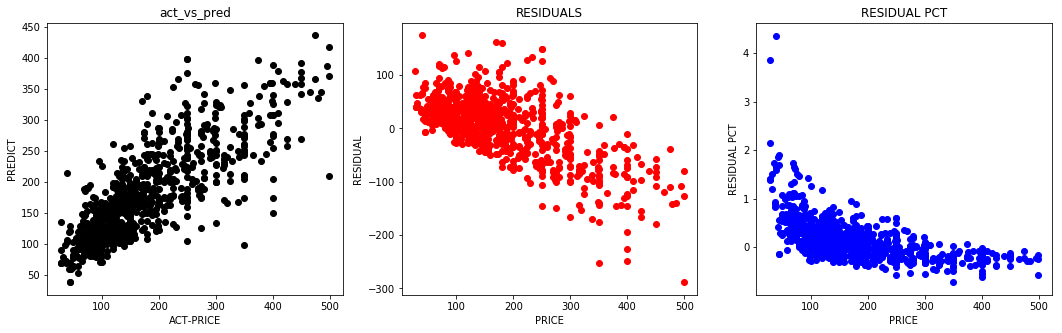

In [47]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(y_test, y_pred,  color='black')
ax1.set_title('act_vs_pred')
ax1.set_xlabel('ACT-PRICE')
ax1.set_ylabel('PREDICT')

ax2.scatter(dfpred.price,dfpred.rf_resid, color='red')
ax2.set_title('RESIDUALS')
ax2.set_xlabel('PRICE')
ax2.set_ylabel('RESIDUAL')

ax3.scatter(dfpred.price,dfpred.rf_residpct, color='blue')
ax3.set_title('RESIDUAL PCT')
ax3.set_xlabel('PRICE')
ax3.set_ylabel('RESIDUAL PCT')

In [48]:
# X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
treelist=[1,5,10,15,25,50,100,150,200,250,300,400,500,700,900]
# params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#           'learning_rate': 0.01, 'loss': 'ls', 'random_state':0}
# params = {'n_estimators': 500}
for trees in treelist:
# for trees in range(25,300,25):
    gbr = GradientBoostingRegressor(n_estimators=trees,random_state=0)
    gbr.fit(X_train, y_train)
    print(trees, gbr.score(X_test,y_test))
# print(rf_score)




1 0.09213376670931395
5 0.3392888321869707
10 0.4770830864470619
15 0.5374659690602392
25 0.5934108356361862
50 0.6385775412129935
100 0.6657967887364695
150 0.6780519142213222
200 0.6809542266877775
250 0.6836190457011793
300 0.6846468314940253
400 0.6859269368785605
500 0.6844470572678002
700 0.6843725844358275
900 0.6812871523107623


# GRADIENT BOOST TUNING

In [51]:
# Gradient Hyper Parameter Grid - Random

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# Learning Rate
alpha = [float(x) for x in np.linspace(start = 0.01, stop = 0.1, num = 5)]
# Create the random grid


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': alpha}


In [52]:
print(random_grid)

{'learning_rate': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [53]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbreg = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbreg_random = RandomizedSearchCV(estimator = gbreg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbreg_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=50 
[CV] n_estimators=200, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=50 
[CV] n_estimators=200, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=50 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=4, max_features=sqrt, max_depth=60 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_l

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.1s


[CV]  n_estimators=1800, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=4, max_features=sqrt, max_depth=70, total=  10.2s
[CV] n_estimators=2000, min_samples_split=5, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=1400, min_samples_split=5, learning_rate=0.01, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  17.3s
[CV] n_estimators=2000, min_samples_split=5, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=600, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=2, max_features=auto, max_depth=110, total=  27.0s
[CV] n_estimators=2000, min_samples_split=5, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=600, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=2, max_features=auto, max_depth=110, total=  26.3s
[CV] n_estimators=800, min_samples_split=10, learning_rate=0.1, min_samples_leaf=2, max_featur

[CV] n_estimators=1400, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=70, total=   8.5s
[CV] n_estimators=1400, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=70, total=   8.3s
[CV] n_estimators=1400, min_samples_split=10, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=2000, min_samples_split=5, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50, total= 1.4min
[CV] n_estimators=1400, min_samples_split=10, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.05500000000000001, min_sam

[CV] n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50, total=  12.3s
[CV] n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50, total=  12.2s
[CV] n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1600, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=2, max_features=auto, max_depth=40, total= 1.1min
[CV] n_estimators=1800, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=s

[CV] n_estimators=1600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=800, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=4, max_features=sqrt, max_depth=60, total=   4.6s
[CV] n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.1min


[CV]  n_estimators=600, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  11.5s
[CV] n_estimators=1200, min_samples_split=5, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=400, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=1, max_features=auto, max_depth=40, total=  15.0s
[CV] n_estimators=1200, min_samples_split=5, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=400, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=1, max_features=auto, max_depth=40, total=  15.3s
[CV] n_estimators=1200, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=110 
[CV]  n_estimators=400, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=1, max_features=auto, max_depth=40, total=  15.1s
[CV] n_estimators=1200, min_samples_split=10, learning_rate=0.05500000000000001, min_samples

[CV]  n_estimators=2000, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=40, total= 1.1min
[CV] n_estimators=800, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=sqrt, max_depth=90, total=   8.4s
[CV] n_estimators=800, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50, total=  43.4s
[CV] n_estimators=800, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=800, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=100, total=   4.9s
[CV] n_estimators=1200, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=4, max_features=s

[CV] n_estimators=1600, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=80, total=  16.9s
[CV] n_estimators=800, min_samples_split=2, learning_rate=0.1, min_samples_leaf=1, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=80, total=  16.1s
[CV] n_estimators=800, min_samples_split=2, learning_rate=0.1, min_samples_leaf=1, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1600, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   9.8s
[CV] n_estimators=800, min_samples_split=2, learning_rate=0.1, min_samples_leaf=1, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1600, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=4, max_featu

[CV] n_estimators=2000, min_samples_split=2, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=2000, min_samples_split=2, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=70, total= 1.2min
[CV] n_estimators=2000, min_samples_split=2, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=2000, min_samples_split=2, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=70, total= 1.1min
[CV] n_estimators=1800, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1400, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   7.9s
[CV] n_estimators=1800, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=sqrt, max_depth=50 
[CV]  n_estimators=800, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=1, max_features=auto, max_dep

[CV]  n_estimators=600, min_samples_split=10, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=None, total=  18.9s
[CV] n_estimators=1000, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=None, total=  19.3s
[CV] n_estimators=1000, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1400, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=2, max_features=auto, max_depth=60, total=  48.0s
[CV] n_estimators=1000, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1400, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=2, max_features=auto, max_depth=60, total=  48.1s
[CV] n_estimators=1400, min_samples_split=10, learning_rate=0.0775, min_sample

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return

In [54]:
#Best Parameters based on the the above search
gbreg_random.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 400}

In [55]:
#EVALUATE THE RANDOM SEARCH BEST PARAMETERS

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rfcv_score = model.score(test_features, test_labels)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('RF Score = {:0.2f}.'.format(rfcv_score))
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("My R2 Score is : ",my_metric(test_labels,predictions))
    return accuracy

In [56]:
# base_model = GradientBoostingRegressor(n_estimators = 10, random_state = 42)
base_model = GradientBoostingRegressor(**params)
base_model.fit(X_train, y_train)
print('********************* BASE MODEL Performance *********************')
base_accuracy = evaluate(base_model, X_test, y_test)



best_random = gbreg_random.best_estimator_
print('********************* RANDOM MODEL Performance *********************')
random_accuracy = evaluate(best_random, X_test, y_test)

********************* BASE MODEL Performance *********************
Model Performance
RF Score = 0.24.
Average Error: 85.3836
Accuracy = 51.60%.
My R2 Score is :  0.23576561207961189
********************* RANDOM MODEL Performance *********************
Model Performance
RF Score = 0.27.
Average Error: 82.5978
Accuracy = 56.49%.
My R2 Score is :  0.2724196020065044


In [57]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 9.47%.


In [56]:
# GRID SEARCH WITH CROSS VALIDATION

In [57]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 1000, 1400, 1750, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=100, max_features=2, min_samples_sp

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s


[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   2.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.1s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=100, max_features=2, min_sa

[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.5s
[CV] n_estimators=2000, max_features=2, min_samples

[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_sa

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.2s


[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.2s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_sam

[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   2.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_sampl

[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   2.6s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   2.7s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_sa

[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1400, max_features=3, min_sampl

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.0s
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.0s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_spl

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min


[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samp

[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_s

[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min

[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_s

[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samp

[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   3.4s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_s

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   1.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.0s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.6s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.6s
[CV] n_estimators=1750, max_features=2, min_samp

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.2s
[CV] n_estimators=1400, max_features=2, min_sam

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.2min


[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.5s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1000, max_features=2, min_

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.4s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samp

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.7s
[CV] n_estimators=1400, max_features=2, min_sam

[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.6s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_sample

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.7s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.6s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_sp

[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.3s
[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.1s
[CV] n_estimators=500, max_features=3, min_samples

[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_s

[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_

[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.5s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_sam

[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_sample

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.0min


[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.4s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.5s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_sa

[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   3.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.4s
[CV] n_estimators=2000, max_features=3, min_samples

[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   3.4s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   3.4s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.6s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   2.2s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   2.2s
[CV] n_estimators=1750, max_features=2, min_sa

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_sampl

[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.6s
[CV] n_estimators=1400, max_features=2, min_s

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samp

[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   2.8s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_sample

[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.1s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.8s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.2s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split

[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.3s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.3s
[CV] n_estimators=500, max_features=3, min_sample

[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   2.8s
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   2.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_s

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.2min


[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   1.0s
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_

[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.3s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.7s
[CV] n_estimators=1750, max_features=3, min_samp

[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.3s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples

[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   3.1s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_sam

[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_sample

[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samp

[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   3.1s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   3.8s
[CV] n_estimators=500, max_features=2, min

[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min

[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min

[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.4s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.4s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.3s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=100, max_features=2

[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   2.2s
[CV] n_estimators=2000, max_features=2, min

[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.1s
[CV] n_estimators=1750, max_features=2,

[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   1.2s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   1.1s
[CV] n_estimators=1400, max_features=

[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   1.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   1.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.6s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.6s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=500, max_features=3, 

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  9.8min


[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.0s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   4.0s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=3

[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.6s
[CV] n_estimators=2000, max_features=3, min

[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.6s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.8s
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.6s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3

[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.4s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1000, max_features=3, m

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.4s
[CV]  n_estimators=2000, max_features

[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.0s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1750, max_features=2,

[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   3.7s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   3.7s
[CV] n_estimators=1000, max_features=2, min_sa

[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.5s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.1s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max

[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.9s
[CV] n_estimators=500, max_features=2, min_s

[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samp

[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=100, max_features=2, 

[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.1s
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=100, max_features=2, min

[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.2s
[CV] n_estimators=2000, max_features

[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=2000, max_features

[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.0s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.1s
[CV] n_estimators=1750, max_features=3, mi

[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.4s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   1.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   4.0s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features

[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.3s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.2s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1400, max_features=3, 

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 12.8min


[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   1.8s
[CV] n_estimators=1750, max_features=3,

[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.1s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=3, m

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.8s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3

[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 13.4min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 100}

In [60]:
best_grid = grid_search.best_estimator_
print('********************* GRID SEARCH MODEL Performance *********************')
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
RF Score = 0.40.
Average Error: 65.7862
Accuracy = 65.81%.
